<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/unidade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Unidade 2 - Zeros de funções




Nesta unidade, vamos estudar métodos iterativos para aproximar raízes de funções. A seguir, apresentamos alguns exemplos discutidos durante a aula.

# Exemplo 1

Considere $f(x)=x^3-2x-5$.



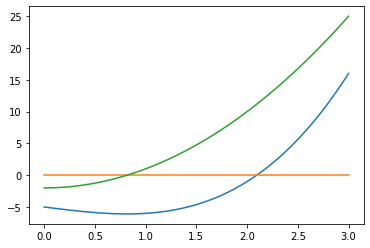

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,3,100)
y = np.zeros(100)
plt.figure(1)
plt.plot(x,x**3-2*x-5,label='f')
plt.plot(x,y,label='y=0')
plt.plot(x,3*x**2-2,label='g')

#print(1.5*1.5*1.3-2*1.5-5)


# Exemplo 2

Considere $f(x)=x^2+0.96x-2.08$. A função $f(x)$ possui uma raiz isolada no intervalo $[0,2]$. 

De fato, $f(x)$ troca de sinal, $f(0)=-2.08$ e $f(2)=3.84$. Além disso, $f'(x)>0,\forall x\in [0,2]$, ou seja, $f(x)$ é crescente em $[0,2]$. Portanto, existe uma única raiz no intervalo $[0,2]$.

 Considere as seguintes funções de ponto fixo:

$$\begin{array}{ll}
\displaystyle{\phi_1(x)=\dfrac{2.08-x^2}{0.96}} & \displaystyle{\phi_2(x)=\dfrac{2.08-0.96x}{x}} \\ 
\displaystyle{\phi_3(x)=\sqrt{2.08-0.96x}} & \displaystyle{\phi_4(x)=\dfrac{2.08}{x+0.96}} \\ 
\displaystyle{\phi_5(x)=\dfrac{2.08+x^2}{2x+0.96}} & \displaystyle{\phi_6(x)=x^2+1.96x-2.08}
\end{array}$$

Vamos considerar $x_0=1.5$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return(x**2 + 0.96*x - 2.08)

def phi1(x):
  return((2.08 - x**2)/0.96)

def phi2(x):
  return((2.08-0.96*x)/x)

def phi3(x):
  return(np.sqrt(2.08-0.96*x))

def phi4(x):
  return((2.08)/(x+0.96))

def phi5(x):
  return((2.08+x**2)/(2*x+0.96))

def phi6(x):
  return(x**2+1.96*x-2.08)

i=  1  xap =  0.8  delta =  0.6719999999999999
i=  2  xap =  1.1454256850621083  delta =  0.3316086576596238
i=  3  xap =  0.9901471316629544  delta =  0.1490674112631878
i=  4  xap =  1.0627599698913974  delta =  0.06970832469930555
i=  5  xap =  1.029441804525277  delta =  0.03198543875147575
i=  6  xap =  1.0448616500071837  delta =  0.01480305166263074
i=  7  xap =  1.0377537357162843  delta =  0.006823597719263663
i=  8  xap =  1.041036221133716  delta =  0.003151186000734718
i=  9  xap =  1.0395216340758053  delta =  0.0014540035755947756
i=  10  xap =  1.040220760842249  delta =  0.0006711616957861821
i=  11  xap =  1.0398981053889083  delta =  0.0003097492352073239
i=  12  xap =  1.0400470272187927  delta =  0.0001429649566890845
i=  13  xap =  1.0399782949032923  delta =  6.598302288018942e-05
i=  14  xap =  1.0400100176886948  delta =  3.0453873986147073e-05
i=  15  xap =  1.039995376441094  delta =  1.4055597696849276e-05
i=  16  xap =  1.040002133948075  delta =  6.48720670

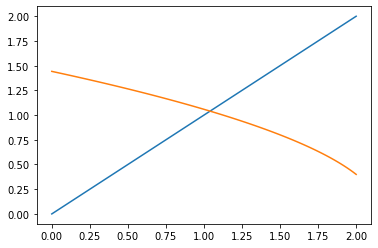

In [ ]:
x0 = 1.5
i = 0
imax = 100
tol = 1.0e-6
d = 1.0
x = np.linspace(0,2,100)
y = np.array(f(x))
z = np.array(phi3(x))

plt.figure(1)
plt.plot(x,x)
plt.plot(x,z)

while(d > tol and i < imax):
  x = phi3(x0)
  d = abs(f(x))
  x0 = x
  i += 1
  print("i= ",i," xap = ",x," delta = ",d)



# Exemplo 3 

$f(x)=2x-\cos(x)$

In [ ]:
def f3(x):
  return(2*x-np.cos(x))

def phi3e(x):
  return(np.cos(x)/2)

In [ ]:
i = 0
x = 0
tol = 1.e-4
imax = 100
while(abs(f3(x)) > tol and i < imax):
  x = phi3e(x)
  i += 1
  print(i,x,abs(f3(x)))

1 0.5 0.12241743810962724
2 0.4387912809451864 0.02768328143004639
3 0.4526329216602096 0.00596709089309988
4 0.44964937621365964 0.0013008038355805107
5 0.4502997781314499 0.0002828875235380002
6 0.4501583343696809 6.155233292448603e-05


# Método da Bisecção

Dados $f(x)$, $a$ e $b$ tais que $f(a)\cdot f(b) < 0$, tol

Algoritmo:

1. $it = 0$
2. $itmax = 100$
3. enquanto ($\dfrac{|b-a|}{2} > tol$ e $it < itmax$): 
4. $\hspace{1pc}$ $\displaystyle{x = \dfrac{b+a}{2}}$
5. $\hspace{1pc}$  se ($f(a)\cdot f(x) < 0$)
6. $\hspace{2pc}$  $b = x$
7. $\hspace{1pc}$  caso contrário:
8. $\hspace{2pc}$  $a = x$
9. $\hspace{1pc}$  $it = it + 1$ 



#Método da Falsa Posição

No método da falsa posição, tomamos a intersecção da reta que passa pelos pontos $(a,f(a))$ e $(b,f(b))$ com o eixo $x$ como uma aproximação para o zero de $f(x)$.

Algoritmo:

Dados $f(x)$, $a$, $b$ e tol

1. $it = 0$
2. $itmax = 100$
3. $x = a$
4. enquanto ($|f(x)| > tol$ e $it < itmax$):
5. $\hspace{1pc}$ $\displaystyle{x = \dfrac{a\cdot f(b) - b\cdot f(a)}{f(b)-f(a)}}$
5. $\hspace{1pc}$  se ($f(a)\cdot f(x) < 0$)
6. $\hspace{2pc}$  $b = x$
7. $\hspace{1pc}$  caso contrário:
8. $\hspace{2pc}$  $a = x$
9. $\hspace{1pc}$  $it = it + 1$


In [ ]:
def f(x):
  return(x*x - 2)

def biseccao(a,b,tol):
  it = 0
  itmax = 100
  while(abs(b-a)/2 > tol and it < itmax):
    x = (a+b)/2
    if(f(a)*f(x) < 0):
      b = x
    else:
      a = x
    it += 1
    print(it, x)
  return(x)

In [ ]:
def falsaposicao(a,b,tol):
  it = 0
  itmax = 100
  x = a
  while(abs(f(x)) > tol and it < itmax):
    x = (a*f(b) - b*f(a))/(f(b) - f(a))
    if(f(a)*f(x) < 0):
      b = x
    else:
      a = x
    it += 1
    print(it,x)
  return(x)

In [ ]:
a = 0
b = 2
tol = 1e-4
print("Falsa Posição")
x = falsaposicao(a,b,tol)
print("Bisecção")
y = biseccao(a,b,tol)



Falsa Posição
1 1.0
2 1.3333333333333333
3 1.4
4 1.411764705882353
5 1.4137931034482758
6 1.414141414141414
7 1.4142011834319526
Bisecção
1 1.0
2 1.5
3 1.25
4 1.375
5 1.4375
6 1.40625
7 1.421875
8 1.4140625
9 1.41796875
10 1.416015625
11 1.4150390625
12 1.41455078125
13 1.414306640625
14 1.4141845703125
